# Trainers  (smritika-sadhukhan) Student (Redoy-Sarder)📊📉

In [1]:
# iris dataset

#### import Necessary Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#### import Dataset

In [3]:
df = pd.read_csv("Titanic.csv")

#### Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Data preprocessing
df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [11]:
df.ndim

2

#### Data Cleaning

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(1, inplace=True)

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')

In [15]:
# Define features and target variable
x = df[['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]
y = df['Survived']

In [16]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22.0,1.0,2
1,1,1,1,38.0,2.0,2
2,1,3,1,26.0,1.0,1
3,1,1,1,35.0,1.0,2
4,0,3,0,35.0,1.0,1


In [17]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Embarked    False
Family      False
dtype: bool

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Embarked    float64
Family        int64
dtype: object

### Data Visualisation 

# 📉 📊 🎯 🧲 🏘 🌈

## EDA (Exploratory Data Analysis)

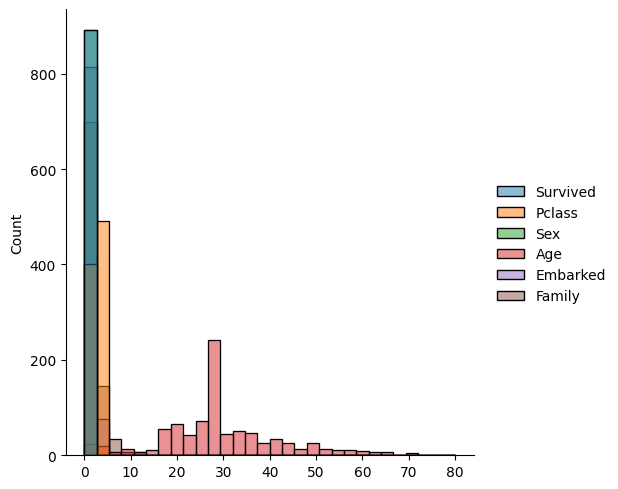

In [19]:
sns.displot(df, kde=False, bins=30)
plt.show()

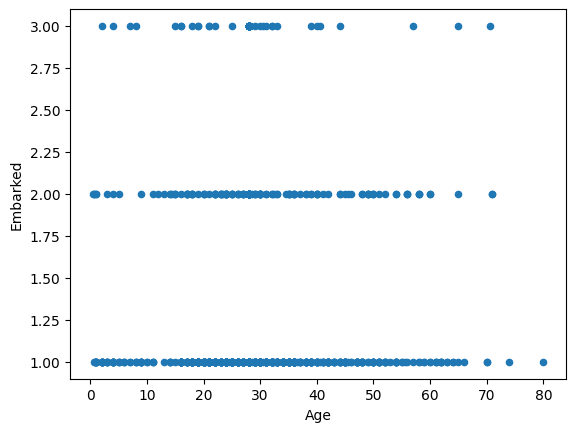

In [20]:
df.plot(kind='scatter', x='Age', y='Embarked')
plt.show()

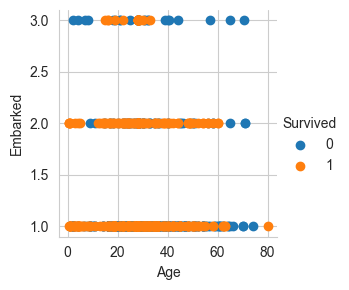

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survived").map(plt.scatter, "Age", "Embarked").add_legend();
plt.show();

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\744177928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Embarked', data=df, palette='Set3')


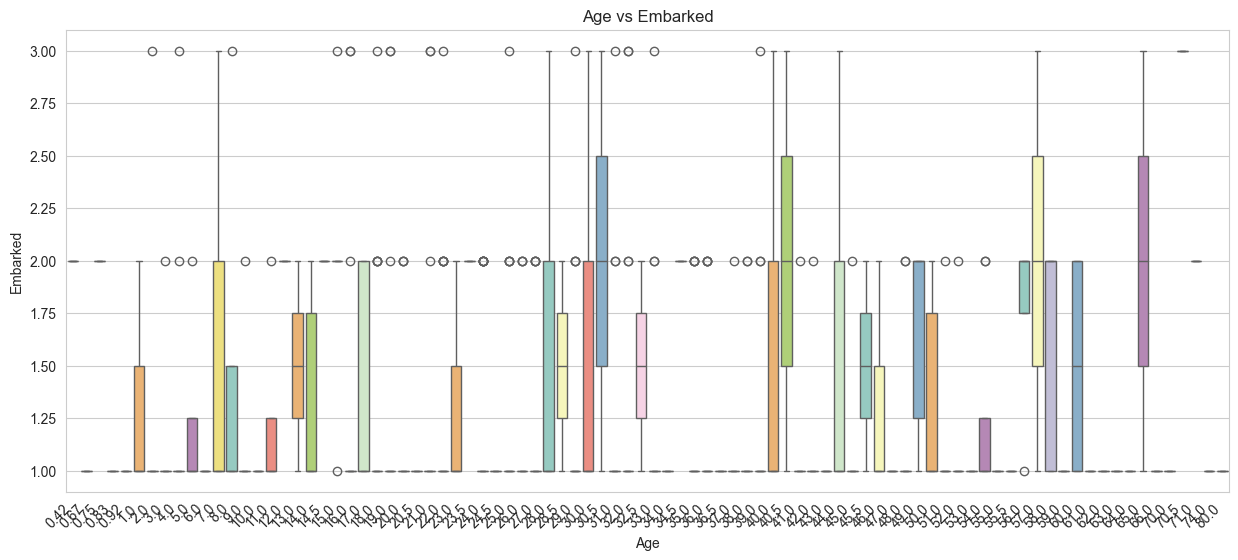

In [22]:
# sepal_length vs sepal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Embarked', data=df, palette='Set3')
plt.title('Age vs Embarked')
plt.xlabel('Age')
plt.ylabel('Embarked')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\4047992600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Pclass', data=df, palette='Set3')


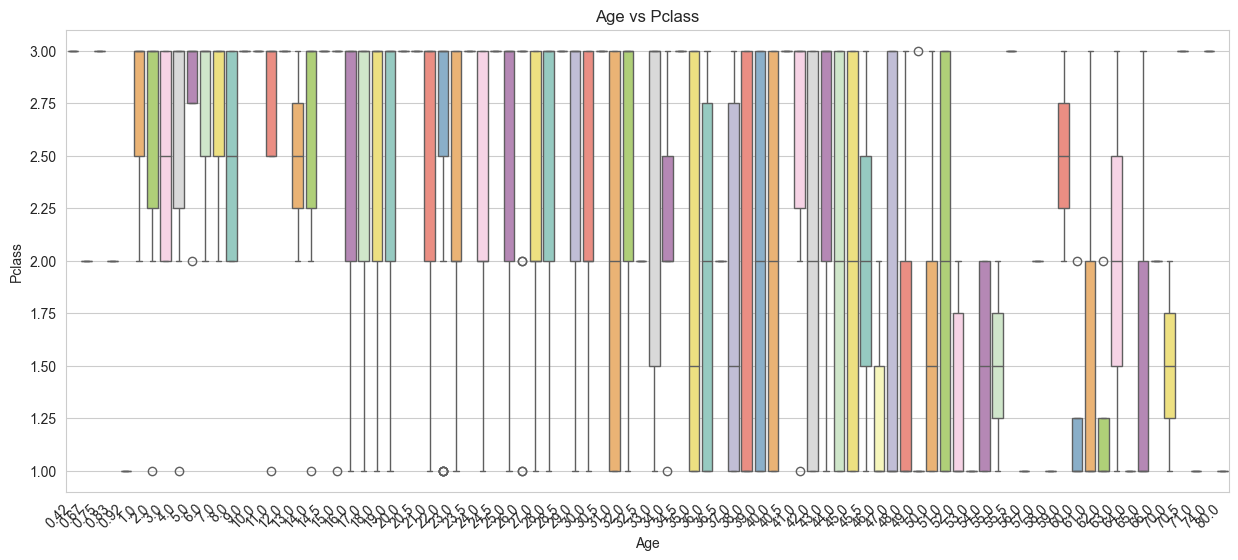

In [23]:
# petal_length vs petal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Pclass', data=df, palette='Set3')
plt.title('Age vs Pclass')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\3163424330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='muted')


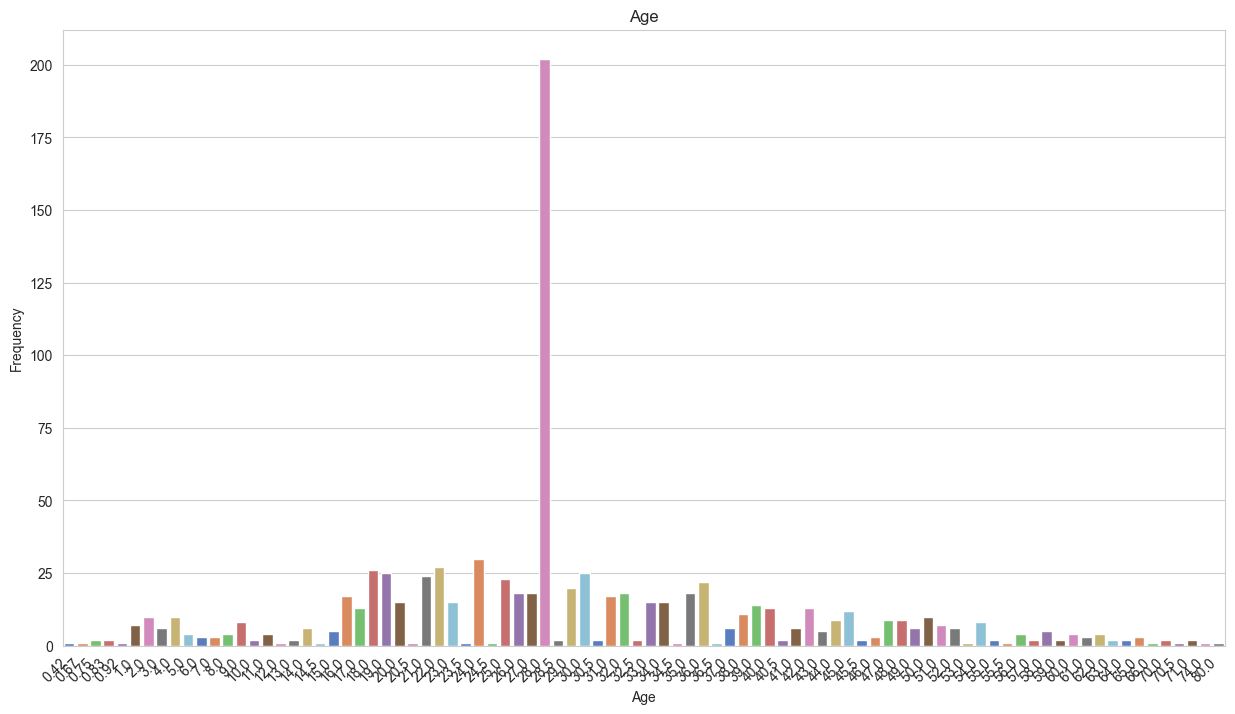

In [24]:
# sepal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Age', data=df, palette='muted')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\691037944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='muted')


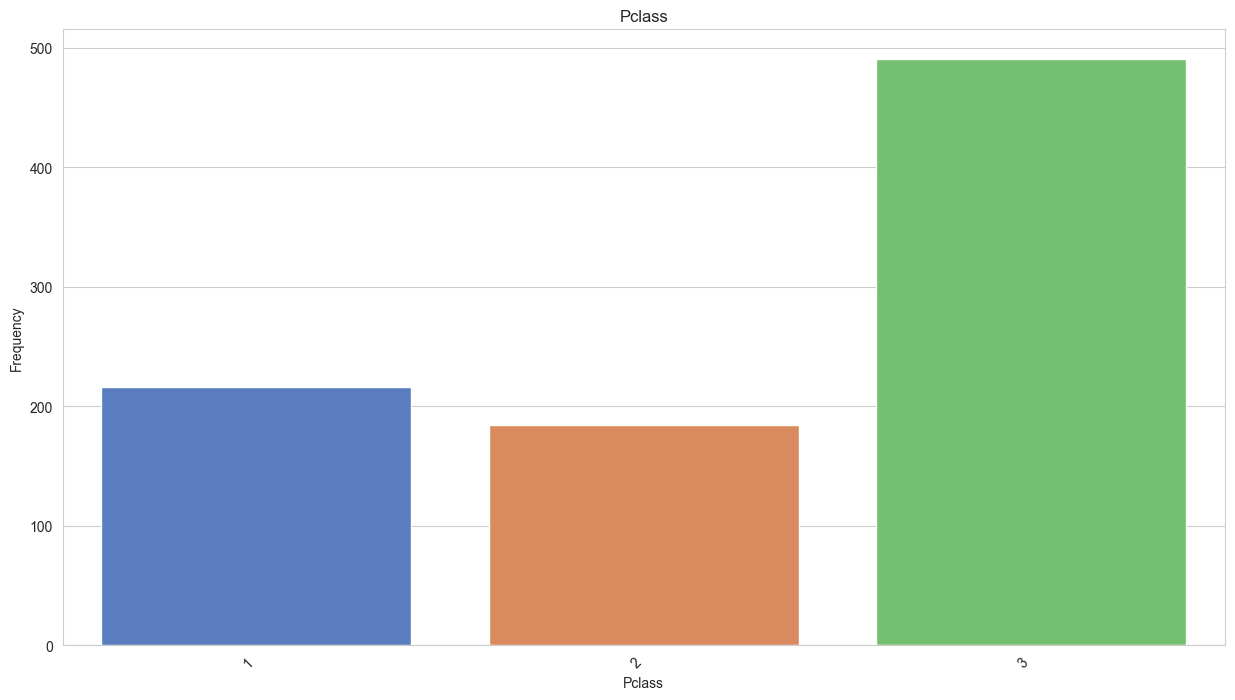

In [25]:
# sepal_width
plt.figure(figsize=(15, 8))
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title('Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\3765621028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='muted')


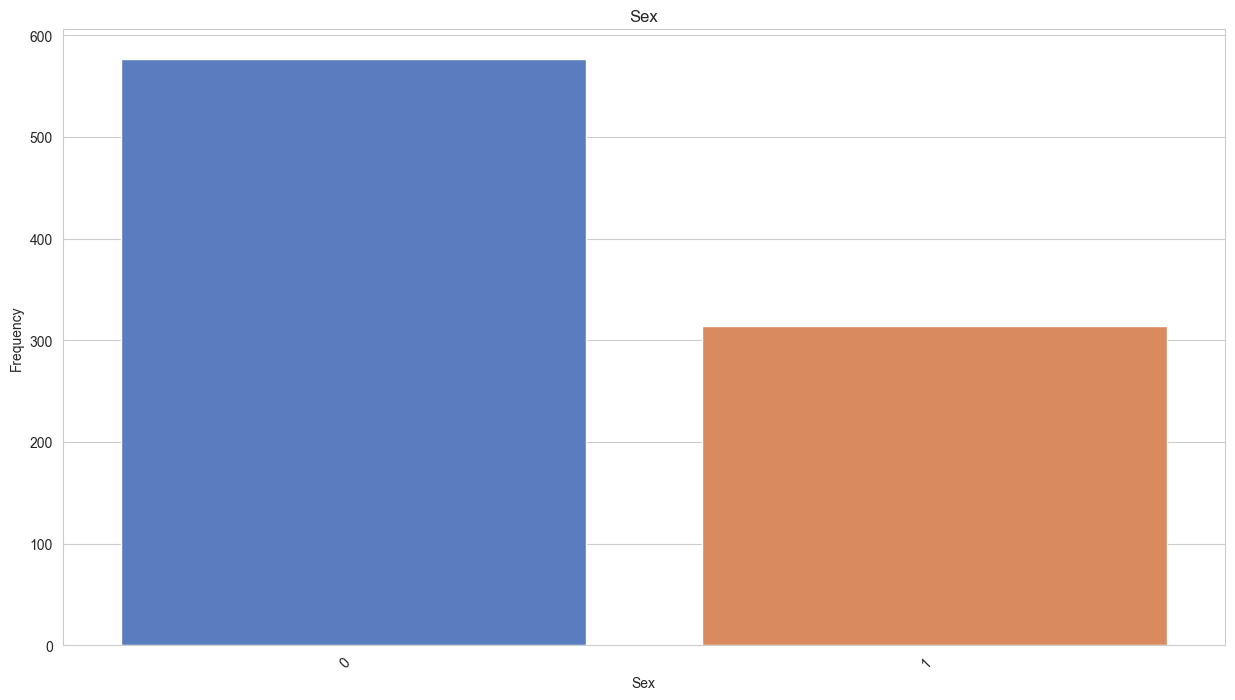

In [26]:
# petal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Sex', data=df, palette='muted')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Local\Temp\ipykernel_1888\1731986733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='muted')


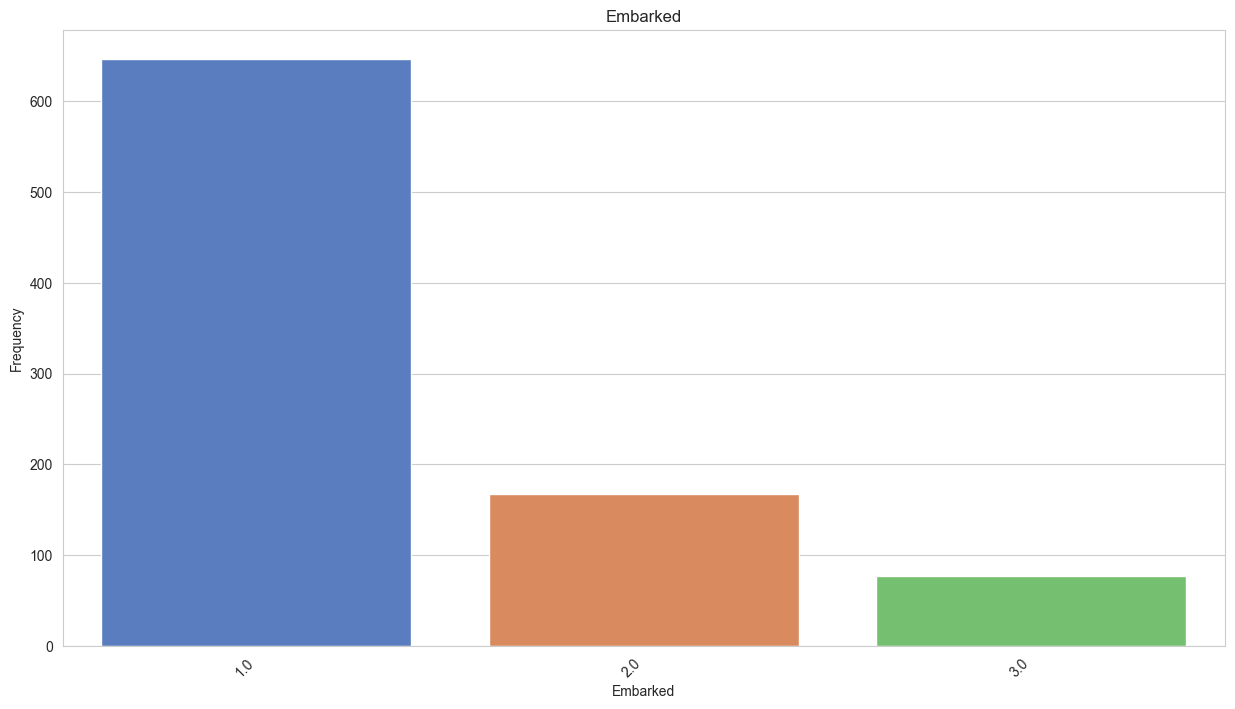

In [27]:
# sepal_width
plt.figure(figsize=(15, 8))
sns.countplot(x='Embarked', data=df, palette='muted')
plt.title('Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


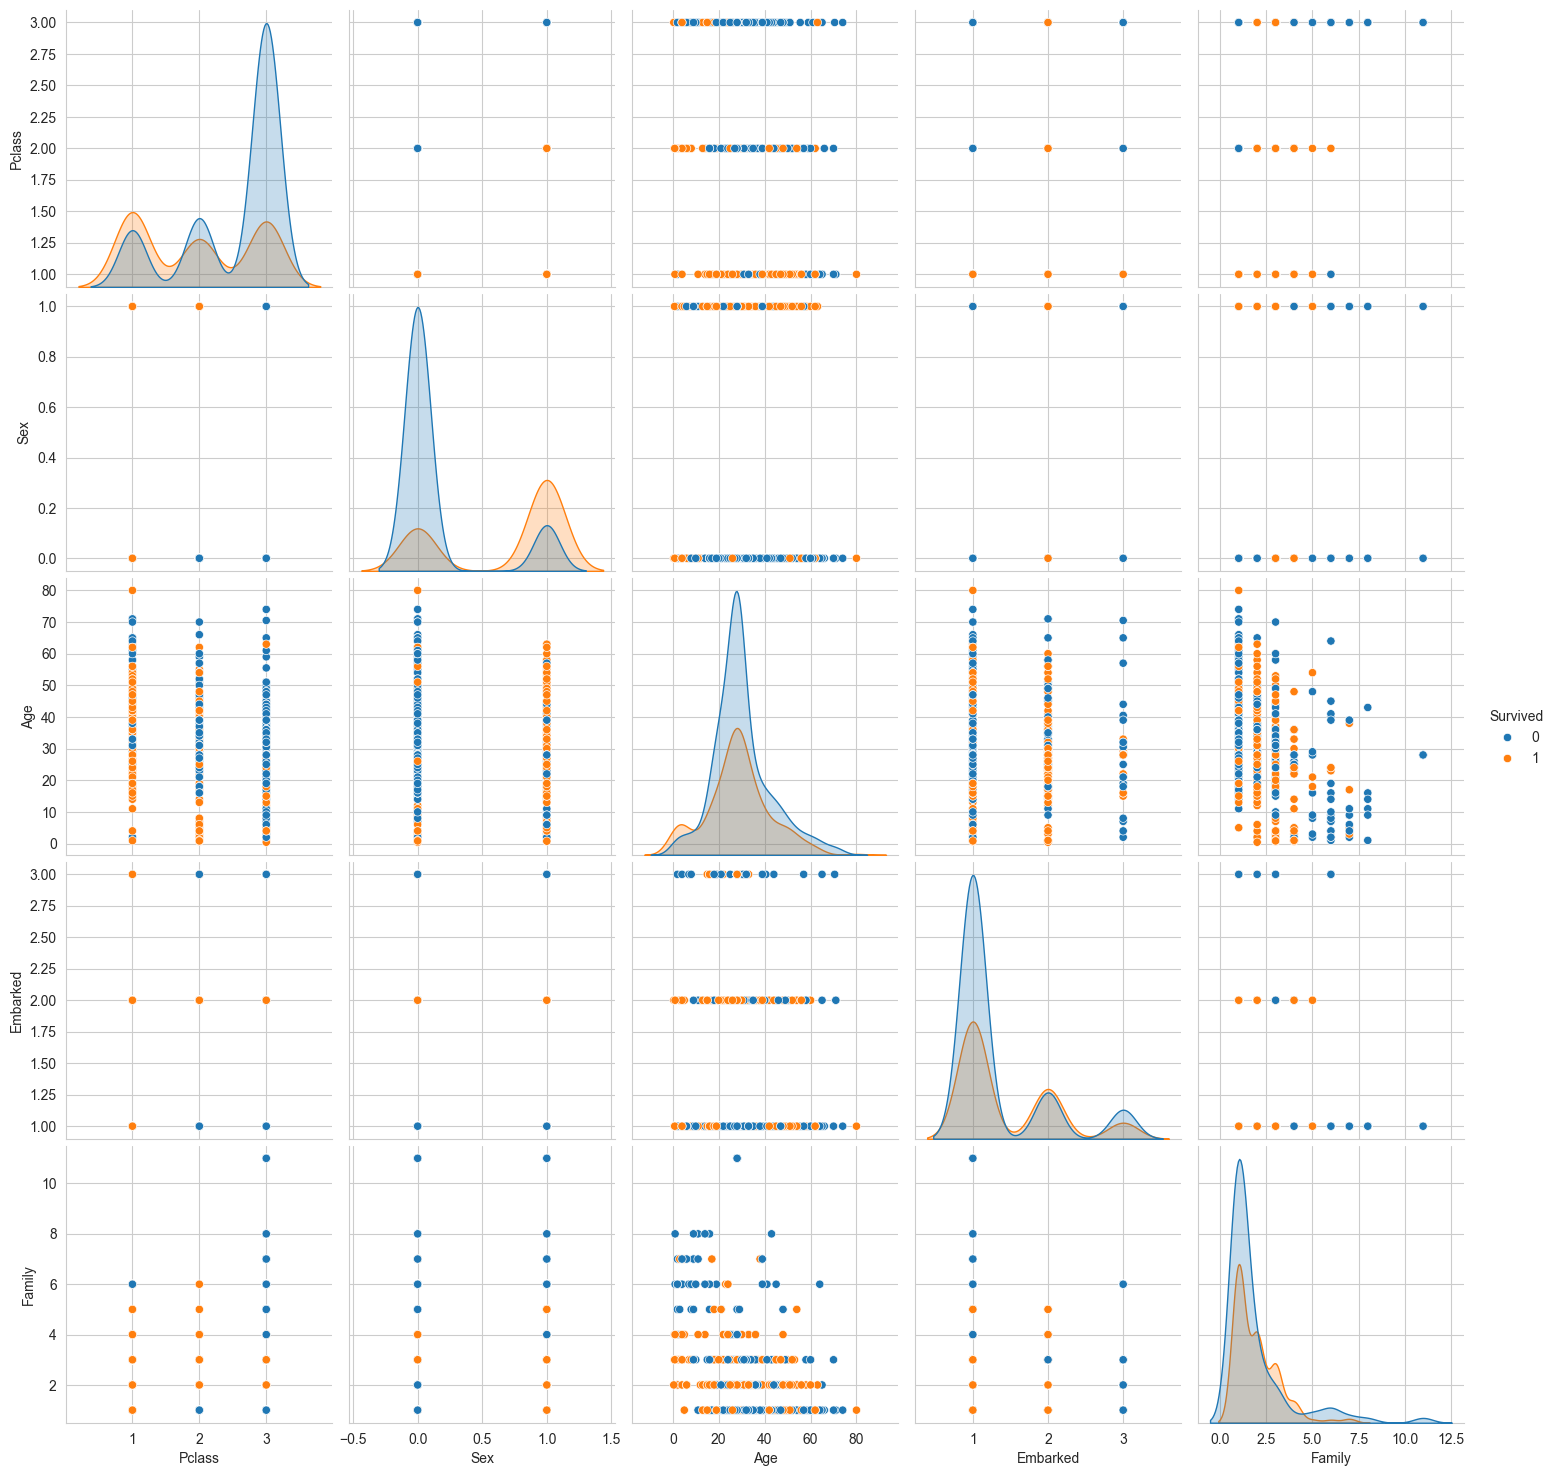

In [28]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Survived", size=3)
plt.show()

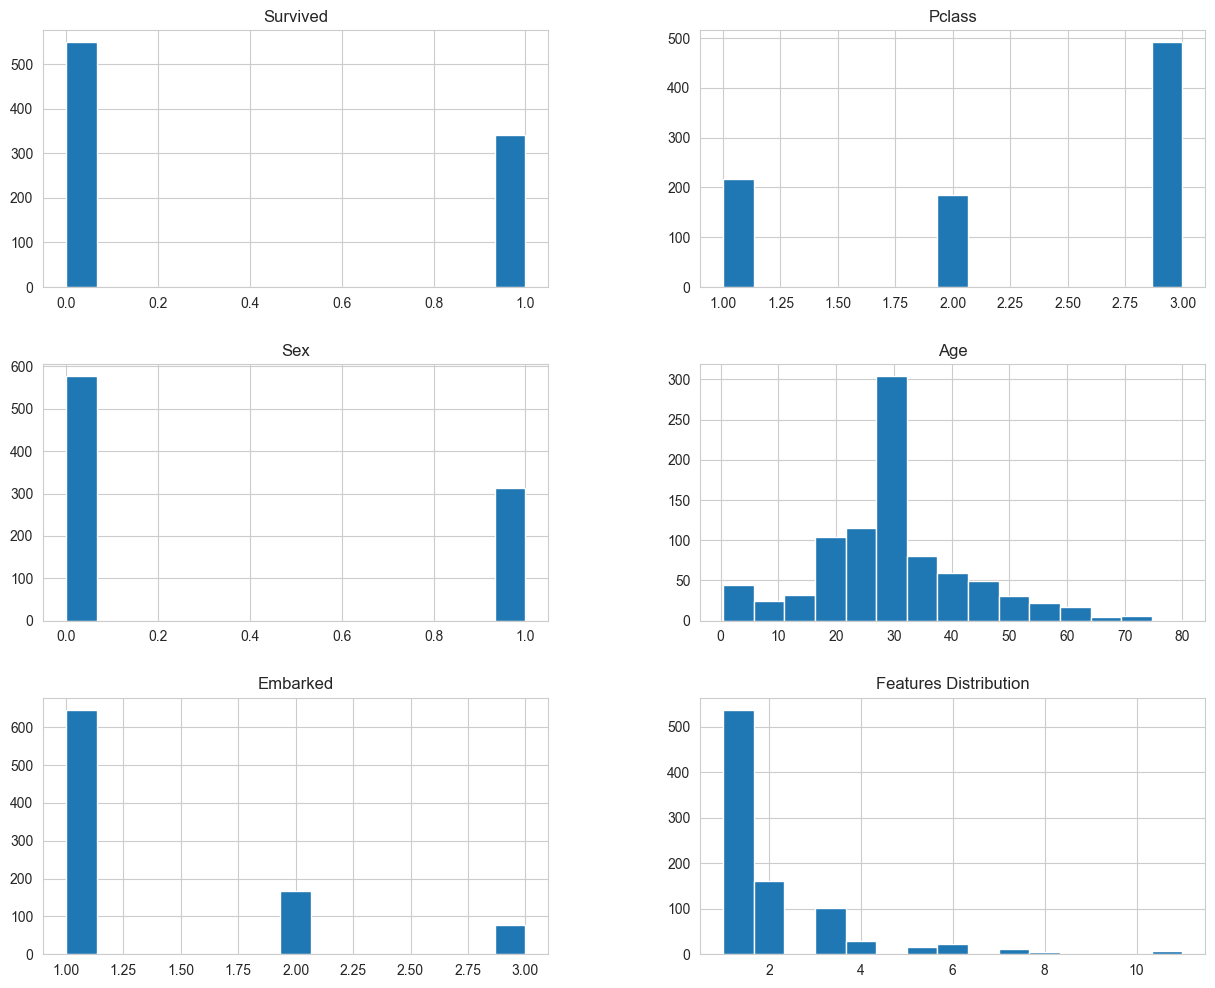

In [29]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# PCA

In [30]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22.0,1.0,2
1,1,1,1,38.0,2.0,2
2,1,3,1,26.0,1.0,1
3,1,1,1,35.0,1.0,2
4,0,3,0,35.0,1.0,1


In [31]:
X = df[['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]

Y = df['Survived']

In [32]:
X.head()

,Pclass,Sex,Age,Embarked,Family
0,3,0,22.0,1.0,2
1,1,1,38.0,2.0,2
2,3,1,26.0,1.0,1
3,1,1,35.0,1.0,2
4,3,0,35.0,1.0,1


In [33]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
pca

PCA(n_components=2)

In [38]:
X_pca = pca.fit_transform(X)

In [39]:
X_pca[0]

array([-7.37313857, -0.14876855])

In [40]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.97870884 0.01416231]


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [42]:
X[0]

array([1.        , 0.        , 0.27117366, 0.        , 0.1       ])

In [43]:
X[1]

array([0.       , 1.       , 0.4722292, 0.5      , 0.1      ])

# Algorithm 🔄

## (1) KNN 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
X = df[['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]

Y = df['Survived']

In [47]:
X.head()

,Pclass,Sex,Age,Embarked,Family
0,3,0,22.0,1.0,2
1,1,1,38.0,2.0,2
2,3,1,26.0,1.0,1
3,1,1,35.0,1.0,2
4,3,0,35.0,1.0,1


In [48]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [51]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = knn_classifier.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [54]:
accuracy = accuracy_score(y_test, y_pred)

In [55]:
accuracy

0.7597765363128491

In [56]:
# prediction new Data

In [58]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = knn_classifier.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
# prediction new Data

In [60]:
new_data = [[3, 1, 22, 1.0, 2.0]]

prediction = knn_classifier.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## (2) Naive Bayes classifier

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [62]:
# GaussianNB

In [63]:
G_classifier = GaussianNB()

In [64]:
G_classifier.fit(X_train, y_train)

GaussianNB()

In [65]:
predictions_G = G_classifier.predict(X_test)

In [66]:
predictions_G

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [67]:
accuracy = metrics.accuracy_score(y_test, predictions_G)

In [68]:
accuracy

0.7653631284916201

In [70]:
new_data = [[3, 0, 22, 1.0, 2.0], [3, 0, 22, 1.0, 2.0]]

new_predictions = G_classifier.predict(new_data)

new_predictions

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int64)

In [71]:
# BernoulliNB

In [72]:
B_classifier = BernoulliNB()

In [73]:
B_classifier.fit(X_train, y_train)

BernoulliNB()

In [74]:
predictions_B = B_classifier.predict(X_test)

In [75]:
predictions_B

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [76]:
accuracy_B = metrics.accuracy_score(y_test, predictions_B)

In [77]:
accuracy_B

0.7821229050279329

In [79]:
new_data = [[3, 0, 22, 1.0, 2.0], [3, 0, 22, 1.0, 2.0]]

new_predictions = B_classifier.predict(new_data)

new_predictions

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int64)

In [80]:
# MultinomialNB

In [81]:
M_classifier = MultinomialNB()

In [82]:
M_classifier.fit(X_train, y_train)

MultinomialNB()

In [83]:
predictions_M = M_classifier.predict(X_test)

In [84]:
predictions_M

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [85]:
accuracy_M = metrics.accuracy_score(y_test, predictions_M)

In [86]:
accuracy_M

0.7821229050279329

In [87]:
new_data = [[3, 0, 22, 1.0, 2.0], [3, 0, 22, 1.0, 2.0]]

new_predictions = M_classifier.predict(new_data)

new_predictions

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int64)

In [88]:
# GaussianNB
# BernoulliNB
# MultinomialNB

# Being the best of them | GaussianNB |

# (3) Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
clf = DecisionTreeClassifier()

In [91]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
y_pred = clf.predict(X_test)

In [93]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [94]:
accuracy

0.7877094972067039

In [96]:
new_data = [[3, 0, 22, 1.0, 2.0]]

new_predictions = clf.predict(new_data)

new_predictions

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [97]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = clf.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [99]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = clf.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# (4) Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [102]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_pred = rf_classifier.predict(X_test)

In [104]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [105]:
accuracy

0.8212290502793296

In [107]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = rf_classifier.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [108]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = rf_classifier.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# (5) Boosting Algorithm

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
base_classifier = DecisionTreeClassifier(max_depth=1)

In [111]:
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [112]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [113]:
y_pred = adaboost_classifier.predict(X_test)

In [114]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [115]:
accuracy

0.8100558659217877

In [117]:
new_data = [[3, 0, 22, 1.0, 2.0]]

prediction = adaboost_classifier.predict(new_data)

prediction

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

- [x] KNN
- [x] Naive Bayes classifier
- [x] Decision Tree
- [x] Random Forest
- [x] Boosting Algorithm

- [x] Random Forest

Random Forest is best Algorithm in this Dataset